In [1]:
import pandas as pd
import seaborn as sns
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
iris_sklearn = load_iris(as_frame=True)
iris_df = iris_sklearn.frame

In [3]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Convert 'species' from numeric to categorical for easier EDA
iris_df['species'] = iris_df['species'].map(
    {i: species for i, species in enumerate(iris_sklearn.target_names)}
)

In [5]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Text(0.5, 1.02, 'Pairplot of Iris Features')

<Figure size 1000x600 with 0 Axes>

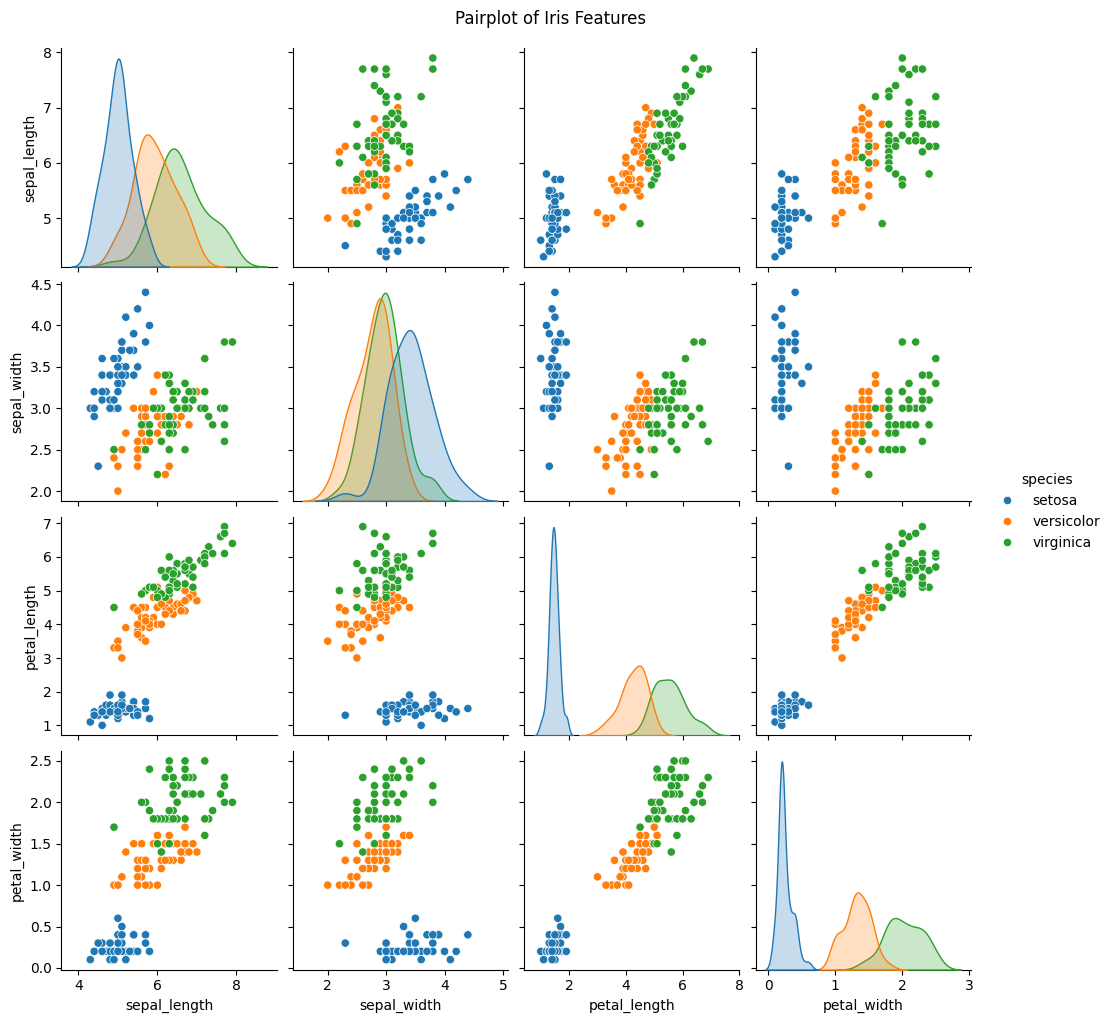

In [6]:
iris_summary = iris_df.describe(include='all')

# Visualizations for EDA
plt.figure(figsize=(10, 6))
sns.pairplot(iris_df, hue='species', diag_kind='kde')
plt.suptitle("Pairplot of Iris Features", y=1.02)


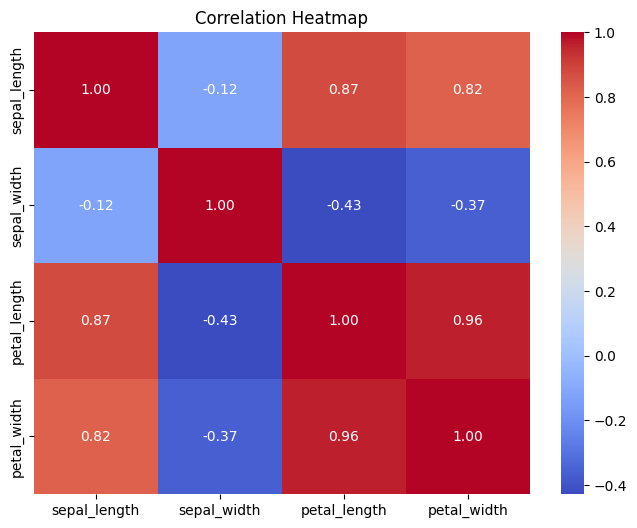

In [7]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Text(0.5, 1.02, 'Pairplot of Iris Features (Numeric Encoding for Species)')

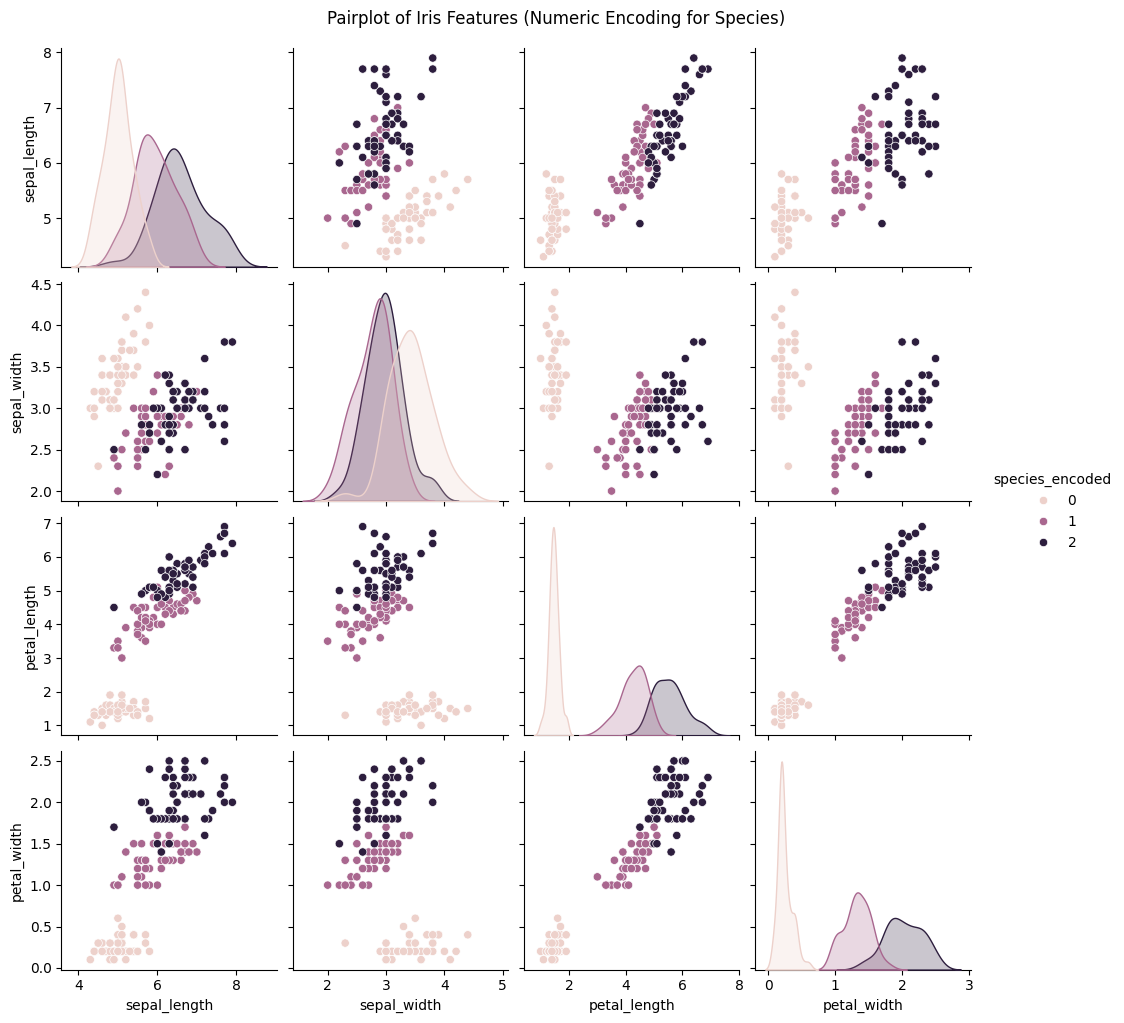

In [8]:
# Encode species as numeric for visualization
iris_df['species_encoded'] = iris_df['species'].astype('category').cat.codes

# Pairplot without the categorical 'species' column directly
sns.pairplot(iris_df.drop(columns=['species']), hue='species_encoded', diag_kind='kde')
plt.suptitle("Pairplot of Iris Features (Numeric Encoding for Species)", y=1.02)

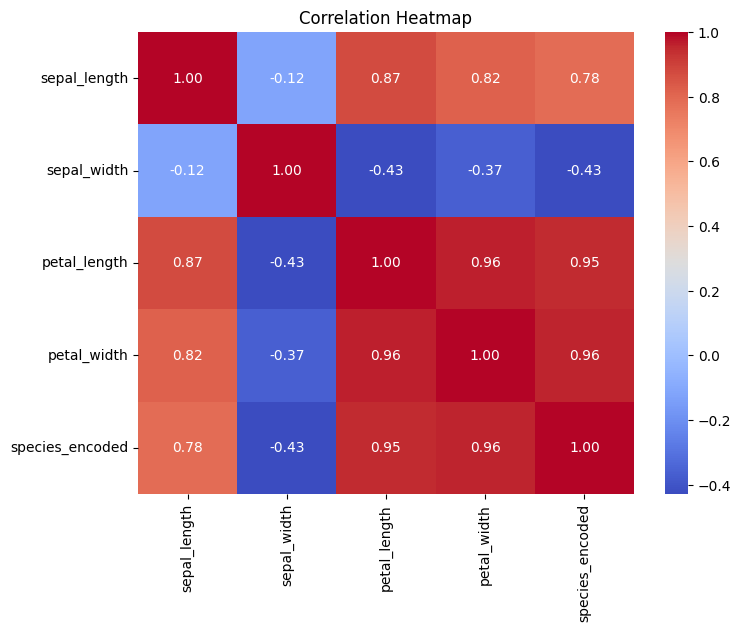

In [9]:
# Correlation heatmap (exclude species for correlation)
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df.drop(columns=['species']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Text(0.5, 1.02, 'Pairplot of Iris Features (Only Numeric)')

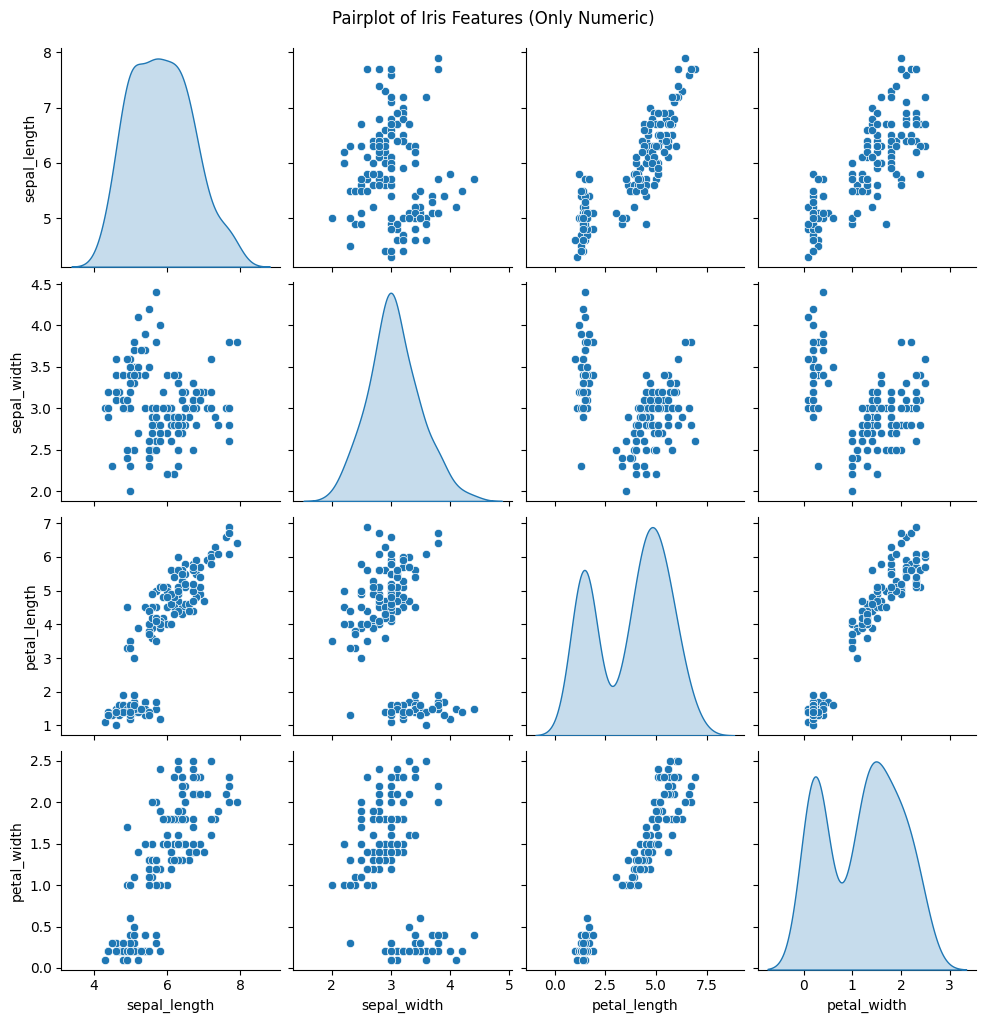

In [10]:
# Pairplot with only numeric features (excluding species)
sns.pairplot(iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], diag_kind='kde')
plt.suptitle("Pairplot of Iris Features (Only Numeric)", y=1.02)

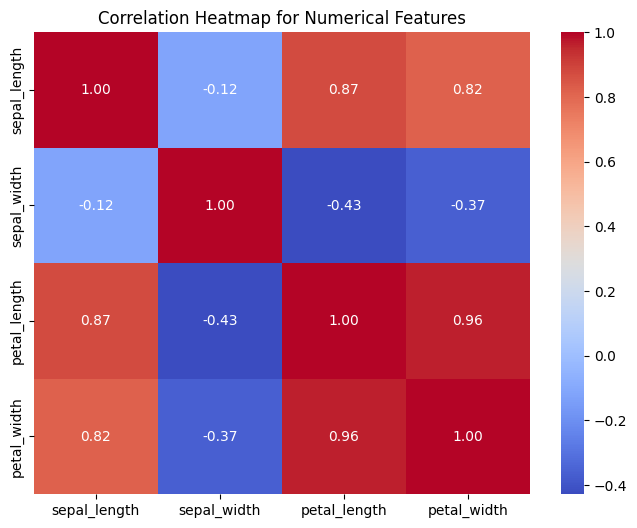

In [11]:
# Correlation heatmap for numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Numerical Features")
plt.show()

In [12]:
iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].info()
iris_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


sepal_length       0
sepal_width        0
petal_length       0
petal_width        0
species            0
species_encoded    0
dtype: int64

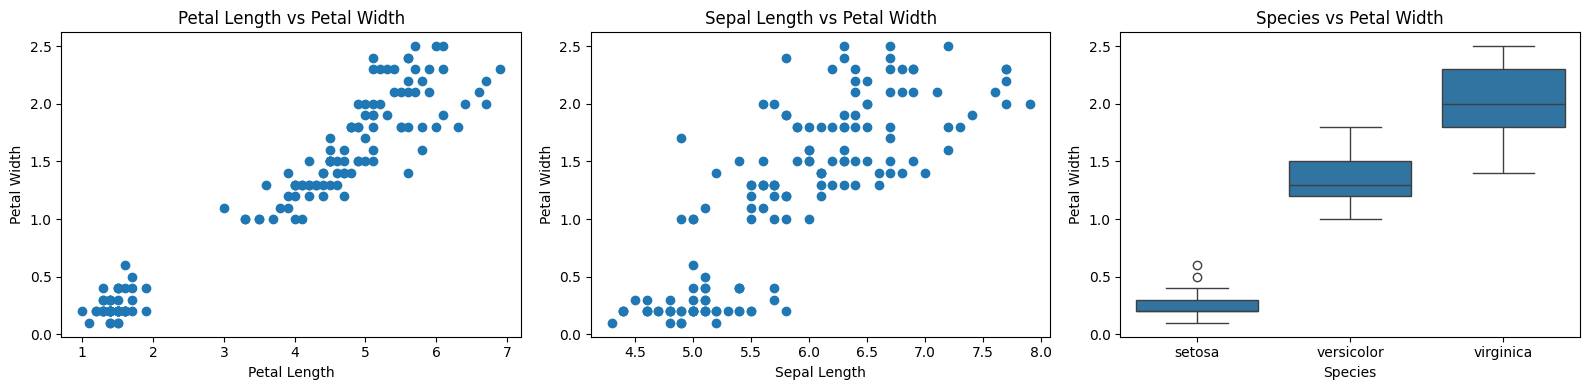

In [13]:
plt.figure(figsize=(16, 4))

#Scatterplot
plt.subplot(1, 3, 1)
plt.scatter(iris_df['petal_length'], iris_df['petal_width'])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Petal Width')

#Scatterplot
plt.subplot(1, 3, 2)
plt.scatter(iris_df['sepal_length'], iris_df['petal_width'])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.title('Sepal Length vs Petal Width')

# Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(x=iris_df['species'], y=iris_df['petal_width'])
plt.xlabel('Species')
plt.ylabel('Petal Width')
plt.title('Species vs Petal Width')

plt.tight_layout()
plt.show()

In [14]:
# One-hot encode 'species' for use in regression
encoder = OneHotEncoder(sparse_output=False, drop='first')
species_encoded = encoder.fit_transform(iris_df[['species']])

In [16]:
import pickle

with open("../Model/encoder3.pkl", "wb") as f:
    pickle.dump(encoder, f)

In [21]:
# Combine all features
X = pd.DataFrame(species_encoded, columns=encoder.get_feature_names_out(['species']))
X['petal_length'] = iris_df['petal_length']
X['sepal_length'] = iris_df['sepal_length']

# Target
y = iris_df['petal_width']

In [23]:
X.describe()

,species_versicolor,species_virginica,petal_length,sepal_length
count,150.000000,150.000000,150.000000,150.000000
mean,0.333333,0.333333,3.758000,5.843333
std,0.472984,0.472984,1.765298,0.828066
min,0.000000,0.000000,1.000000,4.300000
25%,0.000000,0.000000,1.600000,5.100000
50%,0.000000,0.000000,4.350000,5.800000
75%,1.000000,1.000000,5.100000,6.400000
max,1.000000,1.000000,6.900000,7.900000


In [18]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [19]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.02823286816278713, 0.955584643418853)

In [20]:
with open("../Model/model3.pkl", "wb") as f:
    pickle.dump(model, f)

In [30]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [31]:
# Define the PyTorch model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

In [32]:
# Initialize the model, loss function, and optimizer
input_dim = X_train.shape[1]
model_torch = LinearRegressionModel(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_torch.parameters(), lr=0.01)

In [33]:
# Train the model
epochs = 1000
for epoch in range(epochs):
    model_torch.train()

    # Forward pass
    y_pred_tensor = model_torch(X_train_tensor)
    loss = criterion(y_pred_tensor, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 0.1017
Epoch [200/1000], Loss: 0.0504
Epoch [300/1000], Loss: 0.0360
Epoch [400/1000], Loss: 0.0336
Epoch [500/1000], Loss: 0.0333
Epoch [600/1000], Loss: 0.0332
Epoch [700/1000], Loss: 0.0332
Epoch [800/1000], Loss: 0.0332
Epoch [900/1000], Loss: 0.0332
Epoch [1000/1000], Loss: 0.0332


In [34]:
# Evaluate the model on test data
model_torch.eval()
y_pred_test_tensor = model_torch(X_test_tensor)
mse_torch = criterion(y_pred_test_tensor, y_test_tensor).item()

In [35]:
# Calculate R² score manually
ss_total = torch.sum((y_test_tensor - torch.mean(y_test_tensor))**2)
ss_residual = torch.sum((y_test_tensor - y_pred_test_tensor)**2)
r2_torch = 1 - ss_residual / ss_total

mse_torch, r2_torch.item()

(0.03250574320554733, 0.9488626718521118)

In [36]:
torch.save(model_torch, "../Model/model3.pth")